# $k$ - modas
---

In [1]:
import numpy as np

In [2]:
# Ejemplo 1
data = np.array([['x', 'y', 'z'],
                 ['y', 'z', 'x'],
                 ['z', 'x', 'x'],
                 ['y', 'z', 'z'],
                 ['x', 'z', 'y'],
                 ['z', 'y', 'x'],
                 ['x', 'x', 'y'],
                 ['z', 'y', 'x']])
# Modas iniciales
modas = np.array([['x', 'y', 'z'],
                  ['z', 'y', 'x']])

In [3]:
distancias = []
grupos = np.zeros(data.shape[0])
# 1. Distancias y grupos
for i, obj in enumerate(data):
    dist = [sum(obj != m) for m in modas]
    distancias.append(dist)
    grupos[i] = np.argmin(dist)
display(grupos, distancias)

array([0., 1., 1., 0., 0., 1., 0., 1.])

[[np.int64(0), np.int64(2)],
 [np.int64(3), np.int64(2)],
 [np.int64(3), np.int64(1)],
 [np.int64(2), np.int64(3)],
 [np.int64(2), np.int64(3)],
 [np.int64(2), np.int64(0)],
 [np.int64(2), np.int64(3)],
 [np.int64(2), np.int64(0)]]

In [4]:
# 2. Recálculo de centroides
for i in range(len(modas)):
    puntos = np.array([data[j] for j in range(len(data)) if grupos[j] == i])
    for m in range(modas.shape[1]):
        # Contar valores únicos por columna
        vals, conts = np.unique(puntos[:, m], return_counts = True)
        # Actualizar modas
        modas[i][m] = vals[np.argmax(conts)]
modas
# 3. Se ejecuta el proceso nuevamente para ver si existen cambios en los centroides.

array([['x', 'z', 'y'],
       ['z', 'y', 'x']], dtype='<U1')

In [5]:
# Biblioteca
!pip install kmodes

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from kmodes.kmodes import KModes

In [8]:
# Con el mismo conjunto de datos:
km = KModes(n_clusters = 2, init = 'random', n_init = 5, verbose = True) # 'Verbose' indica que muestre todo el proceso
grupos = km.fit_predict(data)
display(grupos, km.cluster_centroids_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 2, cost: 8.0
Run 1, iteration: 2/100, moves: 0, cost: 8.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 9.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 8.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 10.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 10.0
Best run was number 1


array([0, 0, 1, 0, 0, 1, 0, 1], dtype=uint16)

array([['x', 'z', 'y'],
       ['z', 'y', 'x']], dtype='<U1')

In [10]:
# ¿Cuál es el mejor k?
# Ejemplo 2
col_cabello = np.array(['rubio', 'castaño', 'pelirrojo', 'negro', 'castaño', 'negro', 'pelirrojo', 'rubio'])
col_ojos = np.array(['azul', 'gris', 'verde', 'café', 'azul', 'gris', 'azul', 'café'])
tipo_cabello = np.array(['lacio', 'chino', 'ondulado', 'ondulado', 'chino', 'chino', 'ondulado', 'lacio'])
personas = ['P1','P2','P3','P4','P5','P6','P7','P8']
df = pd.DataFrame({'person': personas, 'col_cabell0': col_cabello,
                   'col ojos': col_ojos, 'tipo_cabello': tipo_cabello})
df.T

,0,1,2,3,4,5,6,7
person,P1,P2,P3,P4,P5,P6,P7,P8
col_cabell0,rubio,castaño,pelirrojo,negro,castaño,negro,pelirrojo,rubio
col ojos,azul,gris,verde,café,azul,gris,azul,café
tipo_cabello,lacio,chino,ondulado,ondulado,chino,chino,ondulado,lacio


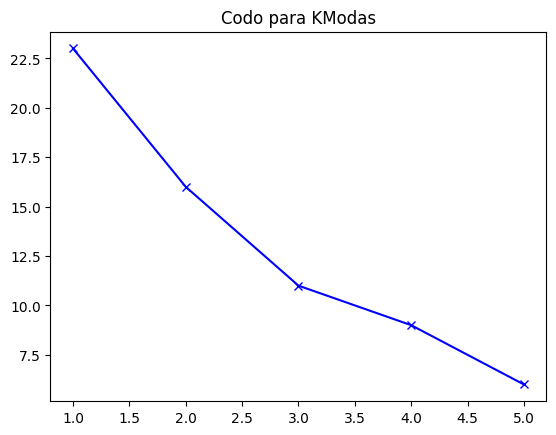

In [11]:
# Gráfica del codo
cost = []
K = range(1, 6)
for n in list(K):
    km = KModes(n_clusters = n, init = 'random', verbose = False, n_init = 5)
    km.fit_predict(df)
    cost.append(km.cost_)
plt.plot(K, cost, 'bx-')
plt.title('Codo para KModas')
plt.show()